In [1]:
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import mne

from scipy.io import loadmat

In [2]:
subj_id = 19

In [3]:
subj_name = f'subj_{subj_id}'

raw_eeg_path = "../../datasets/raw/roch/cocktail_party/EEG/"

if subj_id in range(1, 18):
    attended_env_path = "../../datasets/raw/roch/cocktail_party/Stimuli/Envelopes/20000/"
    unattended_env_path = "../../datasets/raw/roch/cocktail_party/Stimuli/Envelopes/Journey/"
    attended_story = "20000"
    unattended_story = "Journey"
elif subj_id in range(18, 34):
    attended_env_path = "../../datasets/raw/roch/cocktail_party/Stimuli/Envelopes/Journey/"
    unattended_env_path = "../../datasets/raw/roch/cocktail_party/Stimuli/Envelopes/20000/"
    attended_story = "Journey"
    unattended_story = "20000"

analysis_path = "../../datasets/analysis_outputs/roch/cocktail_party/"
os.makedirs(analysis_path, exist_ok=True)
print(f'List analysis path: {os.listdir(analysis_path)}')

subj_analysis_dir = os.path.join(analysis_path, subj_name)
os.makedirs(subj_analysis_dir, exist_ok=True)   
print(f'List subject analysis directory: {os.listdir(subj_analysis_dir)}')

List analysis path: ['subj_23', 'subj_24', 'subj_12', 'subj_15', 'subj_14', 'subj_13', 'subj_25', 'subj_22', '.DS_Store', 'subj_8', 'subj_6', 'subj_1', 'subj_7', 'subj_9', 'subj_31', 'subj_30', 'subj_18', 'subj_27', 'subj_20', 'subj_29', 'subj_16', 'subj_11', 'subj_10', 'subj_28', 'subj_17', 'subj_21', 'subj_26', 'subj_2', 'subj_5', 'subj_4', 'subj_3', 'subj_32', 'subj_33', 'subj_34']
List subject analysis directory: []


In [4]:
print(len(os.listdir(attended_env_path)), os.listdir(attended_env_path))
print('-----------------')
print(len(os.listdir(unattended_env_path)), os.listdir(unattended_env_path))
print('-----------------')
print(len(os.listdir(raw_eeg_path)), os.listdir(raw_eeg_path))
print('-----------------')
print(len(os.listdir(raw_eeg_path + f'Subject{subj_id}/')), os.listdir(raw_eeg_path + f'Subject{subj_id}/'))

30 ['Journey_20_env.mat', 'Journey_30_env.mat', 'Journey_29_env.mat', 'Journey_16_env.mat', 'Journey_9_env.mat', 'Journey_28_env.mat', 'Journey_8_env.mat', 'Journey_17_env.mat', 'Journey_21_env.mat', 'Journey_1_env.mat', 'Journey_15_env.mat', 'Journey_23_env.mat', 'Journey_3_env.mat', 'Journey_22_env.mat', 'Journey_2_env.mat', 'Journey_14_env.mat', 'Journey_11_env.mat', 'Journey_18_env.mat', 'Journey_7_env.mat', 'Journey_27_env.mat', 'Journey_6_env.mat', 'Journey_19_env.mat', 'Journey_26_env.mat', 'Journey_10_env.mat', 'Journey_4_env.mat', 'Journey_24_env.mat', 'Journey_12_env.mat', 'Journey_13_env.mat', 'Journey_5_env.mat', 'Journey_25_env.mat']
-----------------
30 ['20000_27_env.mat', '20000_8_env.mat', '20000_18_env.mat', '20000_1_env.mat', '20000_11_env.mat', '20000_10_env.mat', '20000_9_env.mat', '20000_26_env.mat', '20000_19_env.mat', '20000_2_env.mat', '20000_12_env.mat', '20000_24_env.mat', '20000_25_env.mat', '20000_3_env.mat', '20000_13_env.mat', '20000_16_env.mat', '20000_6

### Start preprocessing

Run1 128 [60 60  60] fs:128    Run2 128 [60 64  64] fs:128    Run3 128 [60 60  60] fs:128    Run4 128 [60 61  61] fs:128    Run5 128 [60 60  60] fs:128    Run6 128 [60 60  60] fs:128    Run7 128 [60 60  60] fs:128    Run8 128 [60 60  60] fs:128    Run9 128 [60 60  60] fs:128    Run10 128 [60 60  60] fs:128    Run11 128 [60 60  60] fs:128    Run12 128 [60 61  61] fs:128    Run13 128 [60 60  60] fs:128    Run14 128 [60 60  60] fs:128    Run15 128 [60 60  60] fs:128    Run16 128 [60 61  61] fs:128    Run17 128 [60 62  62] fs:128    Run18 128 [60 60  60] fs:128    Run19 128 [60 60  60] fs:128    Run20 128 [60 60  60] fs:128    Run21 128 [60 63  63] fs:128    Run22 128 [60 60  60] fs:128    Run23 128 [60 60  60] fs:128    Run24 128 [60 60  60] fs:128    Run25 128 [60 64  64] fs:128    Run26 128 [60 60  60] fs:128    Run27 128 [60 60  60] fs:128    Run28 128 [60 60  60] fs:128    Run29 128 [60 61  61] fs:128    Run30 128 [60 60  60] fs:128    
-----------------
Durations of 30 runs
[0, 7680,

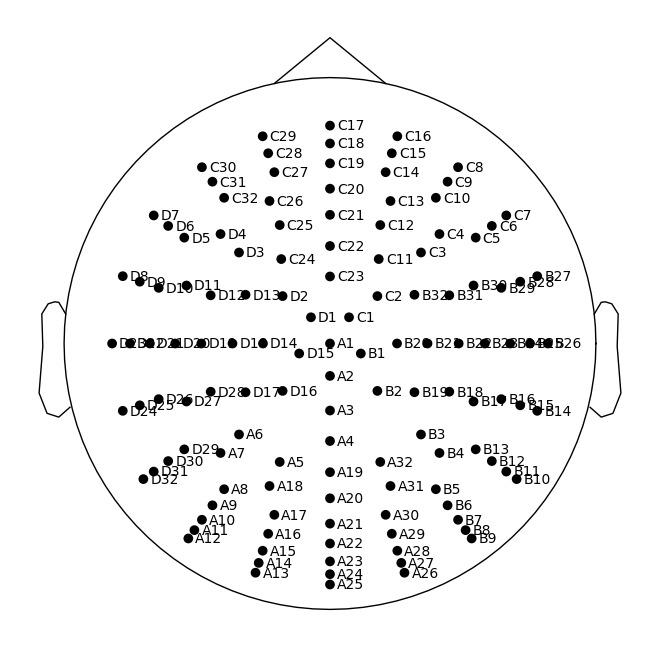

{'EEG0': 'A1', 'EEG1': 'A2', 'EEG2': 'A3', 'EEG3': 'A4', 'EEG4': 'A5', 'EEG5': 'A6', 'EEG6': 'A7', 'EEG7': 'A8', 'EEG8': 'A9', 'EEG9': 'A10', 'EEG10': 'A11', 'EEG11': 'A12', 'EEG12': 'A13', 'EEG13': 'A14', 'EEG14': 'A15', 'EEG15': 'A16', 'EEG16': 'A17', 'EEG17': 'A18', 'EEG18': 'A19', 'EEG19': 'A20', 'EEG20': 'A21', 'EEG21': 'A22', 'EEG22': 'A23', 'EEG23': 'A24', 'EEG24': 'A25', 'EEG25': 'A26', 'EEG26': 'A27', 'EEG27': 'A28', 'EEG28': 'A29', 'EEG29': 'A30', 'EEG30': 'A31', 'EEG31': 'A32', 'EEG32': 'B1', 'EEG33': 'B2', 'EEG34': 'B3', 'EEG35': 'B4', 'EEG36': 'B5', 'EEG37': 'B6', 'EEG38': 'B7', 'EEG39': 'B8', 'EEG40': 'B9', 'EEG41': 'B10', 'EEG42': 'B11', 'EEG43': 'B12', 'EEG44': 'B13', 'EEG45': 'B14', 'EEG46': 'B15', 'EEG47': 'B16', 'EEG48': 'B17', 'EEG49': 'B18', 'EEG50': 'B19', 'EEG51': 'B20', 'EEG52': 'B21', 'EEG53': 'B22', 'EEG54': 'B23', 'EEG55': 'B24', 'EEG56': 'B25', 'EEG57': 'B26', 'EEG58': 'B27', 'EEG59': 'B28', 'EEG60': 'B29', 'EEG61': 'B30', 'EEG62': 'B31', 'EEG63': 'B32', 'EE

<RawArray | 132 x 230409 (1800.1 s), ~232.2 MB, data loaded>

In [5]:
eegs, attended_envs, unattended_envs, mastoids = [], [], [], []
events = []

num_runs = 30
subj_idx = list(range(1, num_runs + 1))
for run in subj_idx:


    eeg_file = os.path.join(raw_eeg_path, f'Subject{subj_id}', f'Subject{subj_id}_Run{run}.mat')
    attended_env_file = os.path.join(attended_env_path, f'{attended_story}_{run}_env.mat')
    unattended_env_file = os.path.join(unattended_env_path, f'{unattended_story}_{run}_env.mat')

    if os.path.isfile(eeg_file) and os.path.isfile(attended_env_file) and os.path.isfile(unattended_env_file):
        eeg, fs, mastoid = tuple(loadmat(eeg_file).get(k, None).T for k in ('eegData', 'fs', 'mastoids'))
        fs = fs.astype(int).item()
        eeg = eeg.astype(np.float64)
        mastoid = mastoid.astype(np.float64)
        
        attended_env = loadmat(attended_env_file)['envelope'].T.astype(np.float64)
        unattended_env = loadmat(unattended_env_file)['envelope'].T.astype(np.float64)

    else:
        print(f'Run {run} does not exist')
        continue

    print(f'Run{run} {eeg.shape[0]} [{eeg.shape[1]/fs:.0f} {attended_env.shape[1]/fs:.0f}  {unattended_env.shape[1]/fs:.0f}] fs:{fs}', end='    ')

    eeg /= 1e6
    attended_env *= 1e2
    unattended_env *= 1e2
    mastoid /= 1e6

    len_min = min([eeg.shape[1], attended_env.shape[1], unattended_env.shape[1]])
    eegs.append(eeg[:, :len_min])
    attended_envs.append(attended_env[:, :len_min])
    unattended_envs.append(unattended_env[:, :len_min])
    mastoids.append(mastoid[:, :len_min])


# RUN information
run_durs = [0]
run_durs.extend([e.shape[1] for e in eegs])
print("")
print("-----------------")
print("Durations of 30 runs")
print(run_durs)
event_points = [sum(run_durs[:i]) for i in range(1, len(run_durs))]
print("Event points")
print(event_points)
print("Event points in minutes")
print(np.array(event_points)//(fs*60))

print("-----------------")
# create events from run_durs
events = [[p, 0, ix+1] for ix, p in enumerate(event_points)]
print("obtained event information:")
print(events)
event_desc={e[2]:f"Run{e[2]}" for  e in events}
annots = mne.annotations_from_events(np.array(events), sfreq=fs, event_desc=event_desc)
#annots[0]['description'] = 'Good'
print(annots[0])

# Concatenate all the runs
eegs = np.concatenate(eegs, axis=1)
attended_envs = np.concatenate(attended_envs, axis=1)
unattended_envs = np.concatenate(unattended_envs, axis=1)
mastoids = np.concatenate(mastoids, axis=1)
print(eegs.shape, attended_envs, unattended_envs, mastoids.shape)
print(eeg[0, :10])

# Create MNE info and raw object
ch_types = ['eeg']*128 + ['bio']*2 + ['stim']*2
ch_names = [f'EEG{i}' for i in range(128)] + ['M1', 'M2'] + ['attended_env', 'unattended_env']
info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=ch_types)
raw = mne.io.RawArray(np.concatenate((eegs, mastoids, attended_envs, unattended_envs), axis=0), info)
raw.add_events(events)
raw.set_annotations(annots)
print(raw)

print("-----------------")
# Set Montage
montage_name = "biosemi128"
montage = mne.channels.make_standard_montage(montage_name, head_size='auto')
print(montage)
print(montage.ch_names)
print(dir(montage))
%matplotlib inline
with mne.viz.use_browser_backend('matplotlib'):
    montage.plot();

biosemi_ch_names = montage.ch_names
mapping_ch_names = dict(zip(raw.ch_names[:128], biosemi_ch_names))
print(mapping_ch_names)
raw.rename_channels(mapping=mapping_ch_names)
raw.set_montage(montage)



### Check reference channels

Effective window size : 2.000 (s)
dict_keys(['_sfreq', '_inst_type', 'info', 'preload', '_method', '_dims', '_data_type', '_data', '_freqs'])


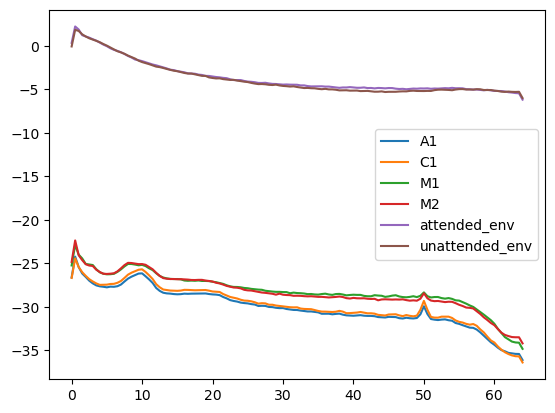

In [6]:
pow_mastoid = raw.copy().compute_psd(picks=['A1', 'C1', 'M1', 'M2', 'attended_env', 'unattended_env'])
print(pow_mastoid.__dict__.keys())
%matplotlib inline
plt.plot(pow_mastoid._freqs, np.log(pow_mastoid._data.T))
plt.legend(['A1', 'C1', 'M1', 'M2', 'attended_env', 'unattended_env'])


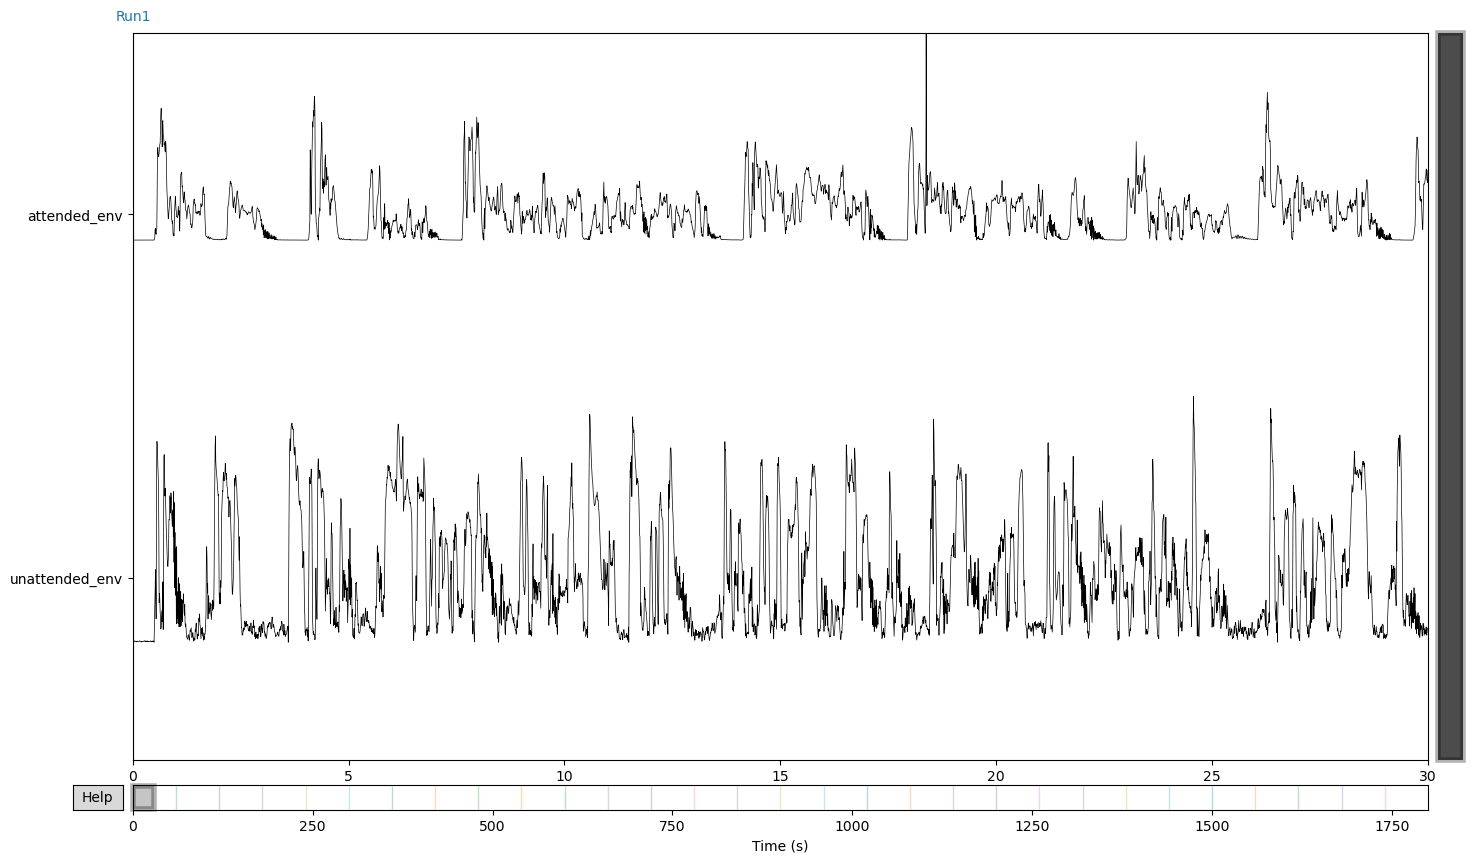

In [7]:
%matplotlib inline
with mne.viz.use_browser_backend('matplotlib'):
    fig2 = raw.copy().pick_channels(['attended_env', 'unattended_env']).plot(duration=30.0, start=0.0, scalings=dict(stim=1))
    fig2.set_size_inches(1, .5);



### Filtering the data


In [8]:
# Remove line Noise only from EEG
freqs_notch = (50)
raw_notch = raw.copy().notch_filter(freqs=freqs_notch, picks=['eeg', 'bio'])
raw_notch_filt = raw_notch.copy().filter(1, 63, picks=['eeg', 'bio'])

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.9s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 63 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 63.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 63.50 Hz)
- Filter length: 423 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.9s finished


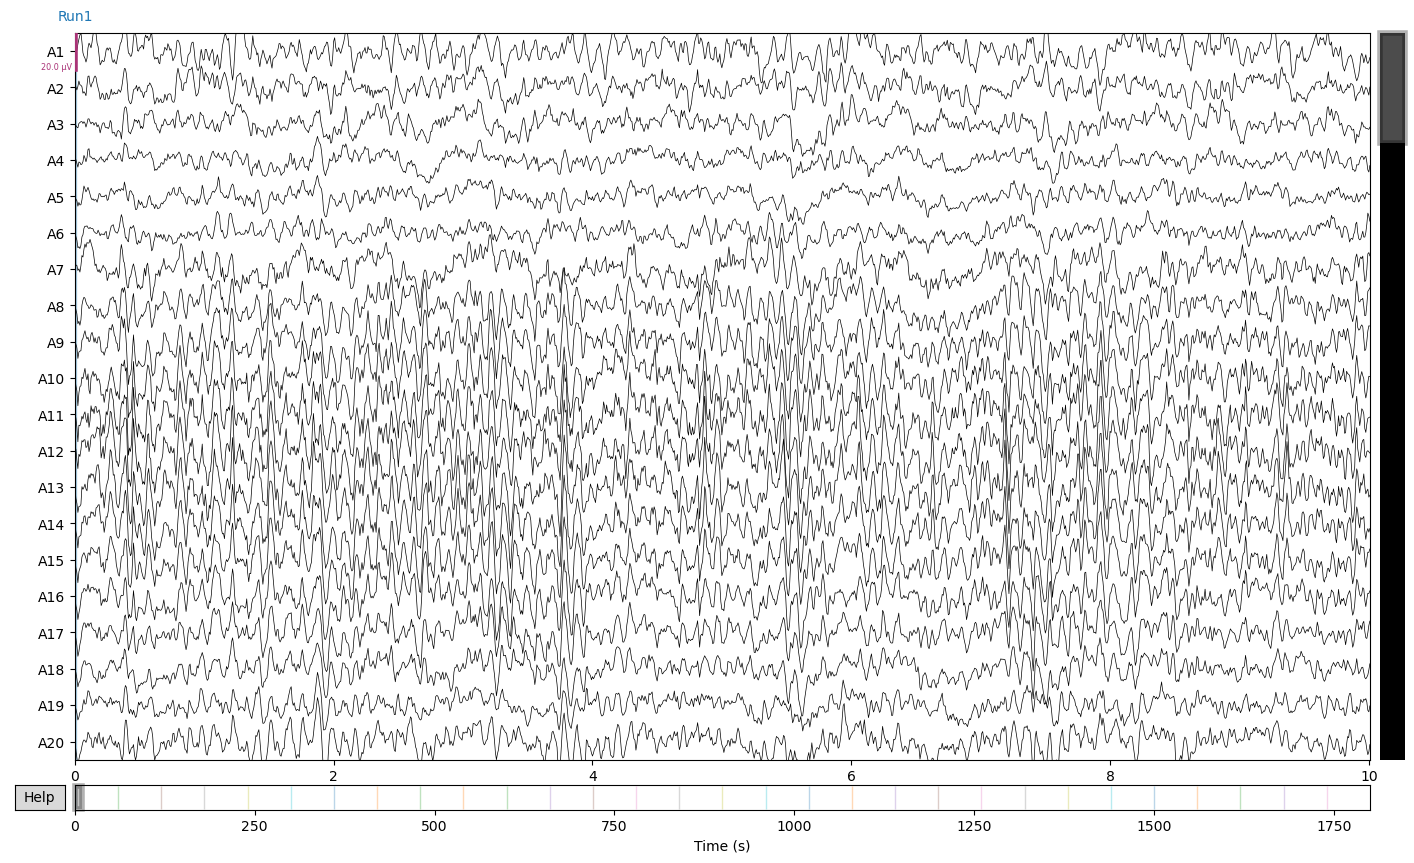

In [9]:
# check if Mastoids capture movements
%matplotlib inline
raw_notch_filt.plot(duration=10.0, start=0.0, scalings=dict(eeg=1e-5, bio=1e-5, stim=1e-2));

Effective window size : 2.000 (s)
dict_keys(['_sfreq', '_inst_type', 'info', 'preload', '_method', '_dims', '_data_type', '_data', '_freqs'])


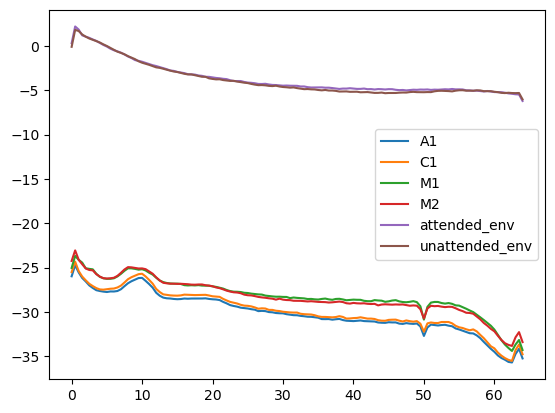

In [10]:
# Check if references are filtered
pow_mastoid = raw_notch_filt.copy().compute_psd(picks=['A1', 'C1', 'M1', 'M2', 'attended_env', 'unattended_env'])
print(pow_mastoid.__dict__.keys())
%matplotlib inline
plt.plot(pow_mastoid._freqs, np.log(pow_mastoid._data.T))
plt.legend(['A1', 'C1', 'M1', 'M2', 'attended_env', 'unattended_env'])

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


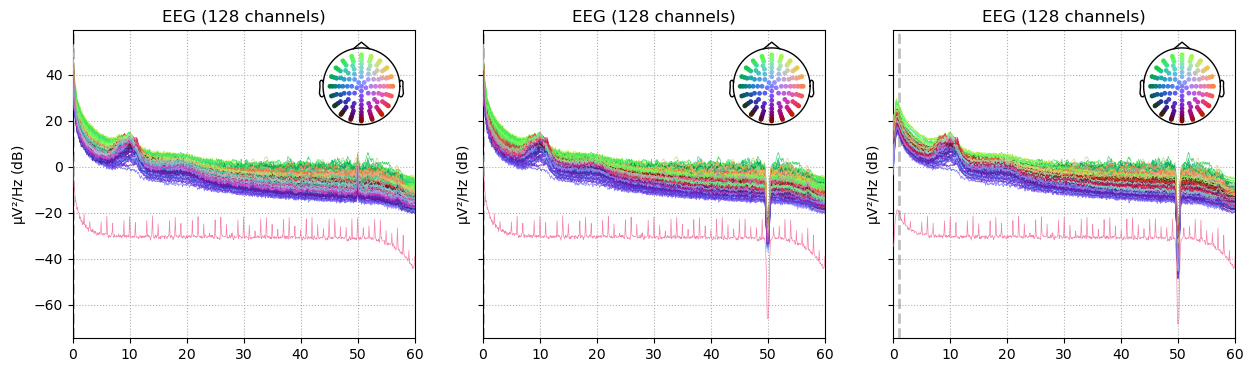

In [11]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True, sharex=True)
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot_psd(fmax=60, ax=ax[0]);
    raw_notch.plot_psd(fmax=60, ax=ax[1]);
    raw_notch_filt.plot_psd(fmax=60, ax=ax[2]);
    plt.savefig(os.path.join(subj_analysis_dir, 'psd_filtering.png'))

In [12]:
# Check if filtering is applied to all channels.
raw_notch_filt.info

<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 128 EEG, 2 BIO, 2 Stimulus
 custom_ref_applied: False
 dig: 131 items (3 Cardinal, 128 EEG)
 highpass: 1.0 Hz
 lowpass: 63.0 Hz
 meas_date: unspecified
 nchan: 132
 projs: []
 sfreq: 128.0 Hz
>

#### Setting the reference channel

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


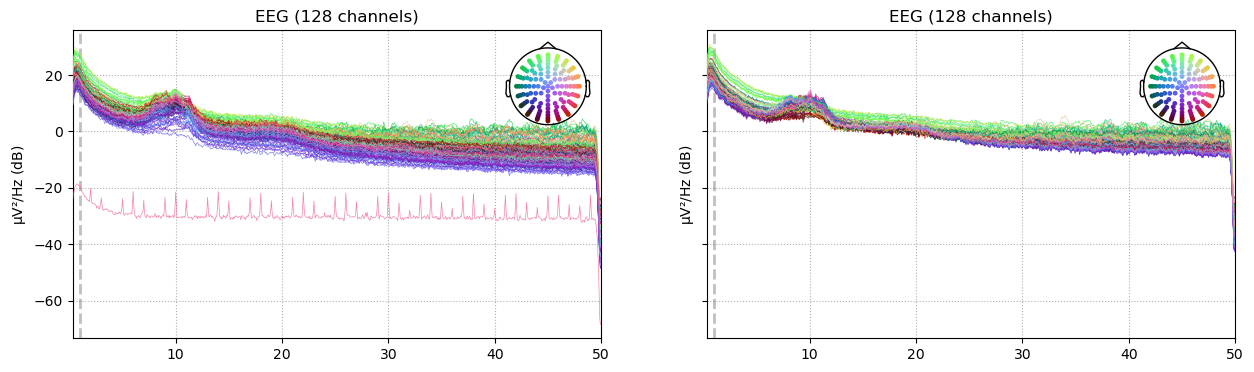

In [13]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharey=True, sharex=True)
if True:
    raw_notch_filt.plot_psd(fmin=0.3, fmax=50, ax=ax[0]);
    raw_notch_filt.set_eeg_reference(['M1', 'M2']);
    raw_notch_filt.plot_psd(fmin=0.3, fmax=50, ax=ax[1]);
    plt.savefig(os.path.join(subj_analysis_dir, 'psd_ref.png'))


### Time segment rejection

In [14]:
%matplotlib qt
raw_ts_dropped  = raw_notch_filt.copy();
raw_ts_dropped.plot(duration=40, n_channels=64);
print('------------------------')
print(raw_ts_dropped.info['bads'])

------------------------
[]


Channels marked as bad:
none


Traceback (most recent call last):
  File "/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 307, in process
    func(*args, **kwargs)
  File "/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/_mpl_figure.py", line 190, in _close
    super()._close(event)
  File "/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/_mpl_figure.py", line 114, in _close
    self.mne.parent_fig.mne.child_figs.remove(self)
ValueError: list.remove(x): x not in list


Setting 42884 of 230409 (18.61%) samples to NaN, retaining 187525 (81.39%) samples.
Effective window size : 2.000 (s)


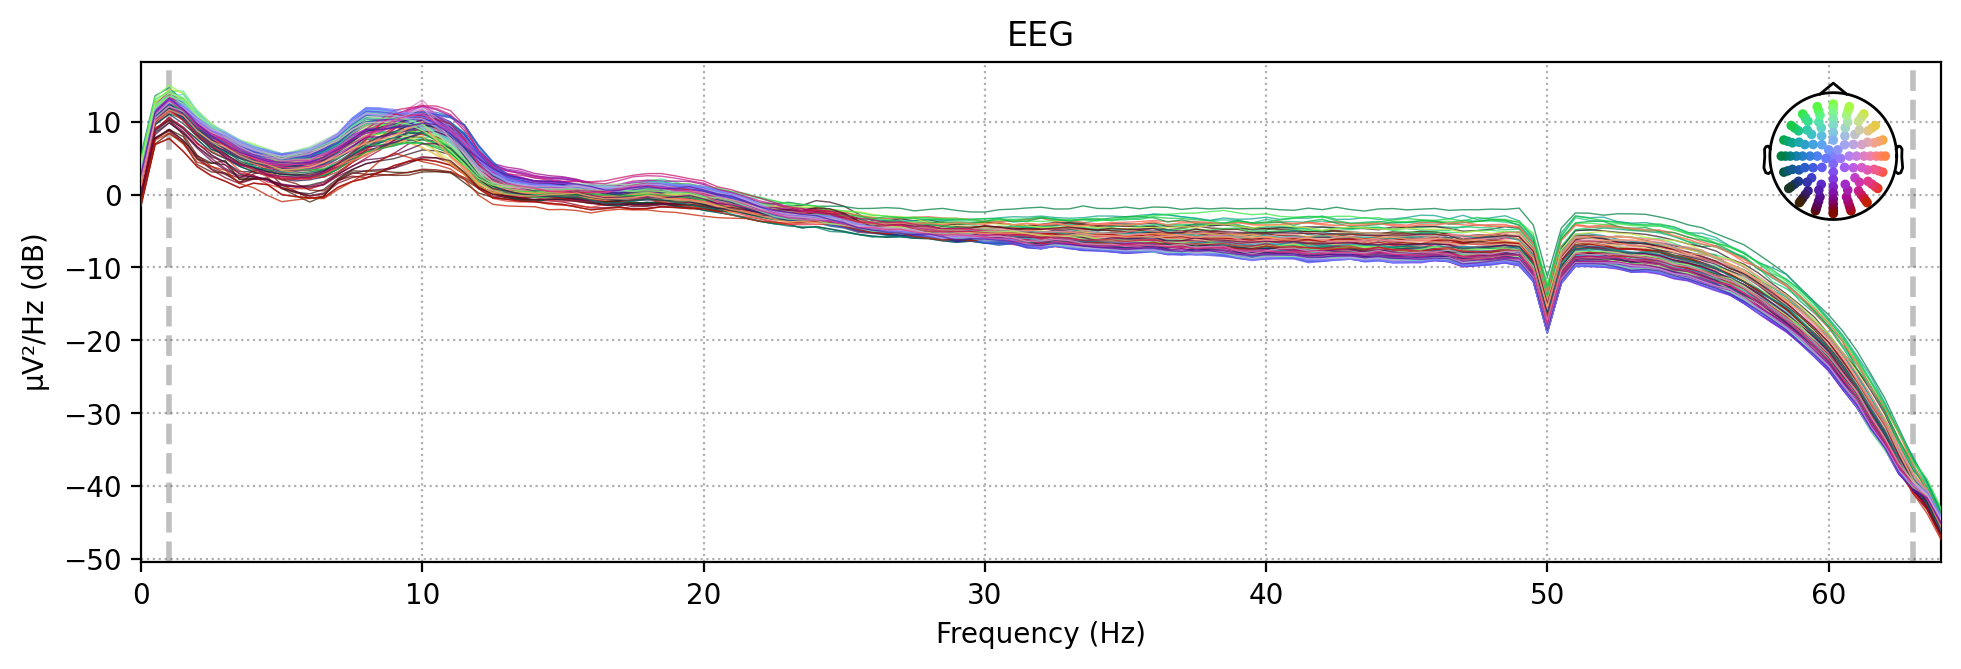

In [15]:
raw_ts_dropped.compute_psd().plot()

### Channel Rejection

In [16]:
%matplotlib qt
#raw_notch_filt.plot_psd()
raw_ts_dropped.plot(duration=40, n_channels=64);
print('------------------------')
print(raw_ts_dropped.info['bads'])

------------------------
[]


Channels marked as bad:
none


In [17]:
# Interpolate bad channels

raw_ts_dropped.annotations.save(os.path.join(subj_analysis_dir, 'file-annotations.fif'))
raw_interp = raw_ts_dropped.copy().interpolate_bads(method=dict(eeg='spline'), verbose=True, reset_bads=False)

/var/folders/cn/42yytr0j3dl9t4k24ldqk59h0000gq/T/ipykernel_62301/1887634194.py:3: RuntimeWarning: This filename (../../datasets/analysis_outputs/roch/cocktail_party/subj_19/file-annotations.fif) does not conform to MNE naming conventions. All annotations files should end with -annot.fif, -annot.fif.gz, _annot.fif, _annot.fif.gz, .txt or .csv
  raw_ts_dropped.annotations.save(os.path.join(subj_analysis_dir, 'file-annotations.fif'))
/var/folders/cn/42yytr0j3dl9t4k24ldqk59h0000gq/T/ipykernel_62301/1887634194.py:4: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw_interp = raw_ts_dropped.copy().interpolate_bads(method=dict(eeg='spline'), verbose=True, reset_bads=False)


In [18]:
[i for i in raw_ts_dropped.annotations]

[OrderedDict([('onset', 0.0),
              ('duration', 0.0),
              ('description', 'Run1'),
              ('orig_time', None)]),
 OrderedDict([('onset', 0.0),
              ('duration', 0.49430501930501913),
              ('description', 'BAD_'),
              ('orig_time', None)]),
 OrderedDict([('onset', 55.78686655405406),
              ('duration', 6.333283059845556),
              ('description', 'BAD_'),
              ('orig_time', None)]),
 OrderedDict([('onset', 60.0),
              ('duration', 0.0),
              ('description', 'Run2'),
              ('orig_time', None)]),
 OrderedDict([('onset', 118.78359073359073),
              ('duration', 2.6877835424710383),
              ('description', 'BAD_'),
              ('orig_time', None)]),
 OrderedDict([('onset', 120.007812),
              ('duration', 0.0),
              ('description', 'Run3'),
              ('orig_time', None)]),
 OrderedDict([('onset', 178.3819679054054),
              ('duration', 3.27477075289

In [19]:
# Set bad labels
raw_interp.annotations.description = ['bad'] * len(raw_interp.annotations)
raw_interp.plot(duration=40, n_channels=128);

Channels marked as bad:
none


### ICA analysis

#### Rereference to common average

In [20]:
raw_ref = raw_interp.copy().set_eeg_reference('average', projection=False)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 42884 of 230409 (18.61%) samples to NaN, retaining 187525 (81.39%) samples.
Effective window size : 16.000 (s)


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 42884 of 230409 (18.61%) samples to NaN, retaining 187525 (81.39%) samples.
Effective window size : 16.000 (s)


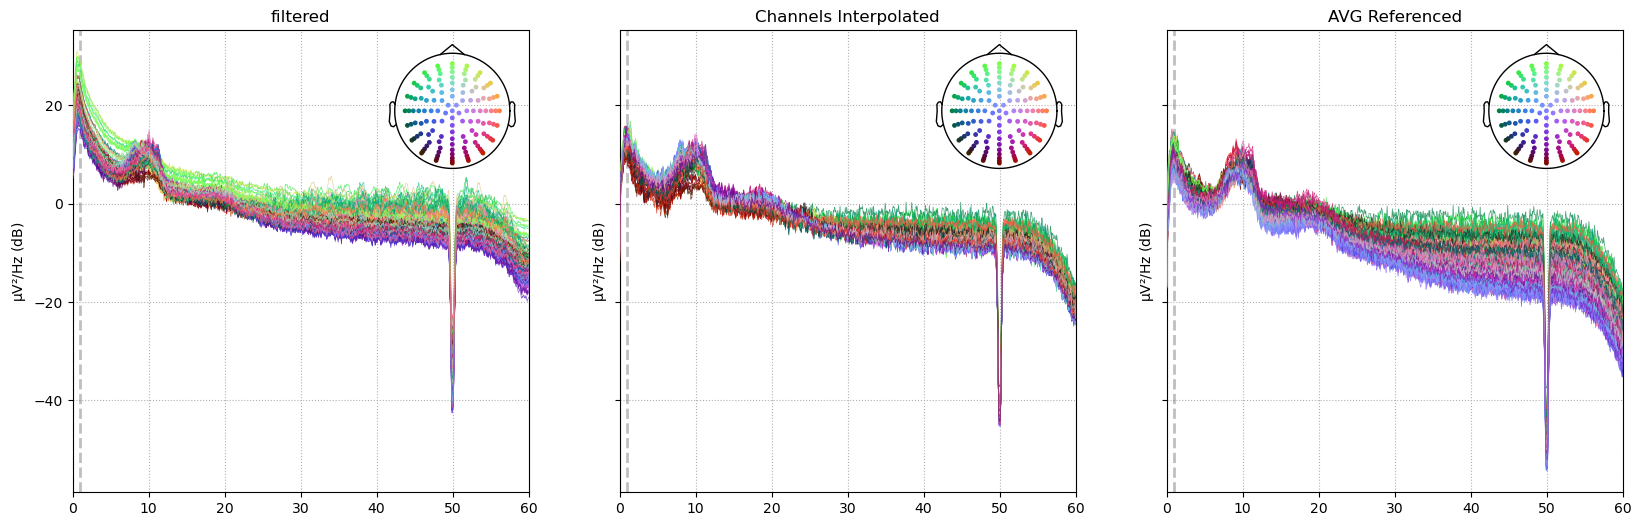

In [21]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True, sharex=True)

with mne.viz.use_browser_backend('matplotlib'):
    raw_notch_filt.plot_psd(fmax=60, ax=ax[0]);
    ax[0].set_title('filtered');
    raw_interp.plot_psd(fmax=60, ax=ax[1]);
    ax[1].set_title('Channels Interpolated');
    raw_ref.plot_psd(fmax=60, ax=ax[2]);
    ax[2].set_title('AVG Referenced');
plt.savefig(os.path.join(subj_analysis_dir, 'psd_avgref.png'))

### ICA Analysis

In [22]:
n_good_eeg_chan = raw_ref.copy().pick_types(eeg=True, exclude='bads').info['nchan']
n_good_eeg_chan

128

In [23]:
ica = mne.preprocessing.ICA(n_components=30, method='infomax', fit_params=dict(extended=True),
              random_state=0)
#ica = ICA(n_components=30, method='fastica', random_state=97)
ica.fit(raw_ref)

Fitting ICA to data using 128 channels (please be patient, this may take a while)
Omitting 42884 of 230409 (18.61%) samples, retaining 187525 (81.39%) samples.
Selecting by number: 30 components
Computing Extended Infomax ICA
Fitting ICA took 31.8s.


<ICA | raw data decomposition, method: infomax (fit in 500 iterations on 187525 samples), 30 ICA components (128 PCA components available), channel types: eeg, no sources marked for exclusion>

['_update_mixing_matrix', 'mixing_matrix_', 'unmixing_matrix_']
 Mixing: (30, 30)   Unmixing: (30, 30)


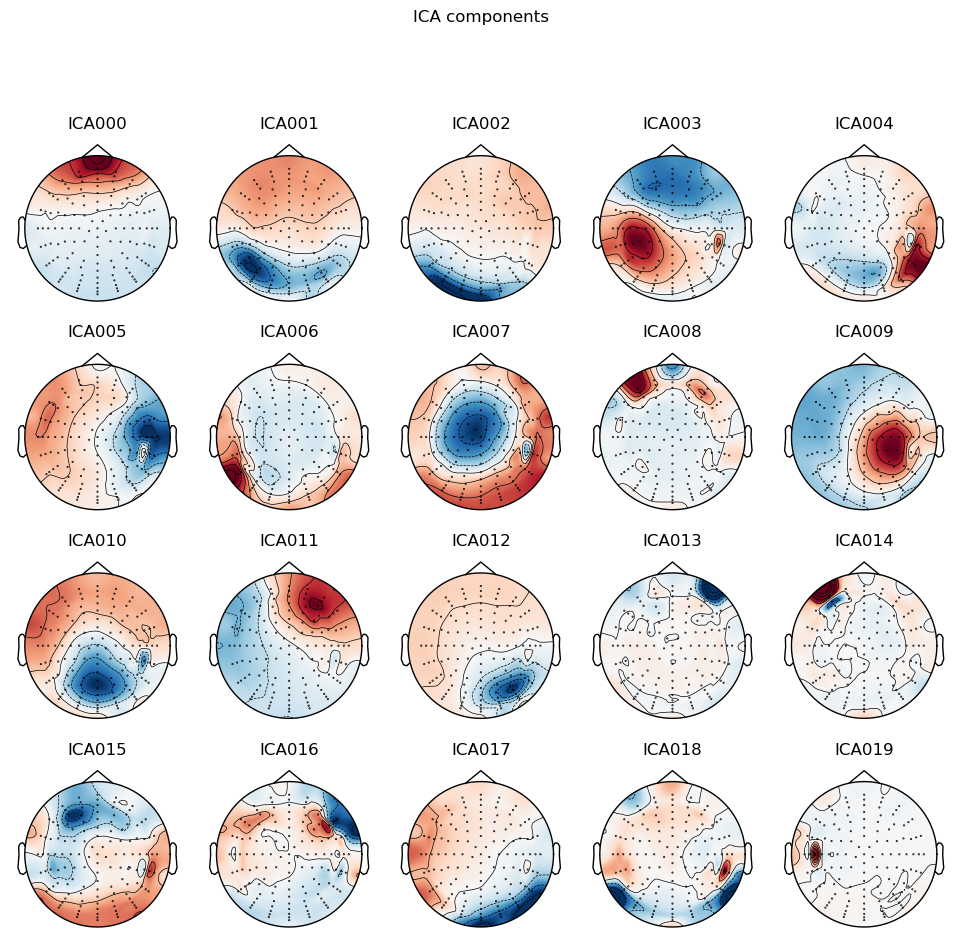

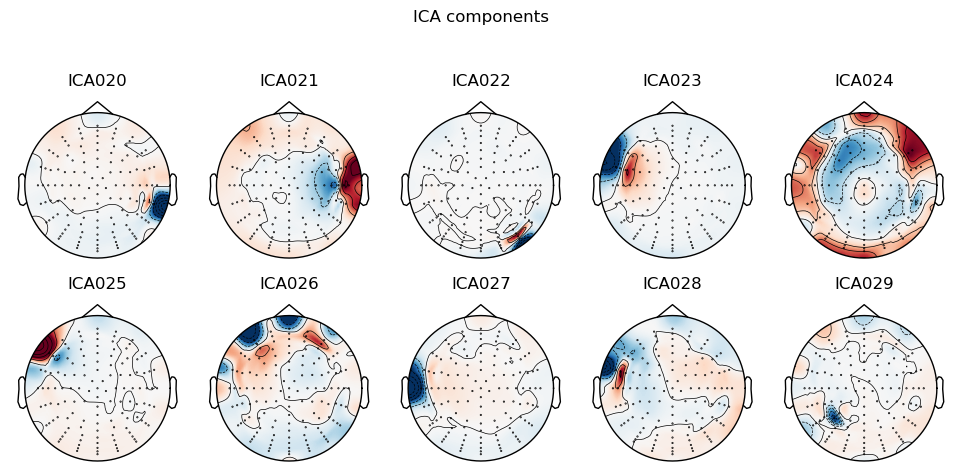

In [24]:
print([i for i in dir(ica) if 'mix' in i])
print(f" Mixing: {ica.mixing_matrix_.shape}   Unmixing: {ica.unmixing_matrix_.shape}")
%matplotlib inline
ica.plot_components();
plt.show()

In [25]:
%matplotlib qt
ica.plot_sources(raw_ref);

Creating RawArray with float64 data, n_channels=30, n_times=230409
    Range : 0 ... 230408 =      0.000 ...  1800.062 secs
Ready.


In [26]:
ica.plot_properties(raw_ref, picks=[0, 8, 22, 20, 23]);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
698 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
698 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
698 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
698 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
698 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
698 matching events found
No baseline correction applied
0 projection items activated


In [27]:
ica.exclude = [0, 8, 22, 20, 23]
raw_ica = raw_ref.copy()
ica.apply(raw_ica, n_pca_components=n_good_eeg_chan-1)


Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 5 ICA components
    Projecting back using 127 PCA components


<RawArray | 132 x 230409 (1800.1 s), ~232.2 MB, data loaded>

Setting 42884 of 230409 (18.61%) samples to NaN, retaining 187525 (81.39%) samples.
Effective window size : 2.000 (s)


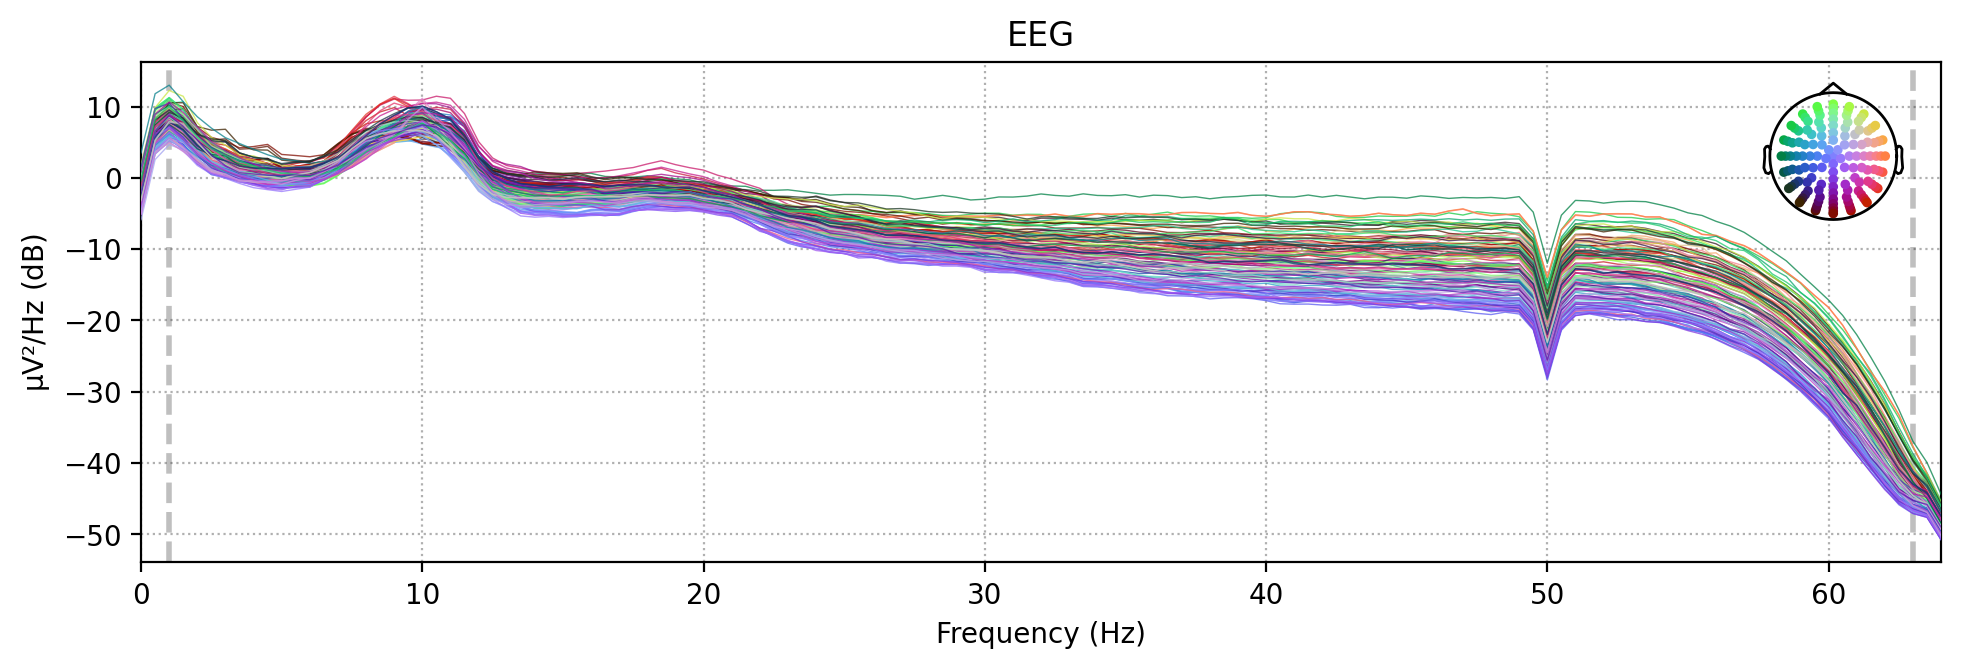

In [28]:
%matplotlib qt
raw_ica.compute_psd().plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 42884 of 230409 (18.61%) samples to NaN, retaining 187525 (81.39%) samples.
Effective window size : 16.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 42884 of 230409 (18.61%) samples to NaN, retaining 187525 (81.39%) samples.
Effective window size : 16.000 (s)


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


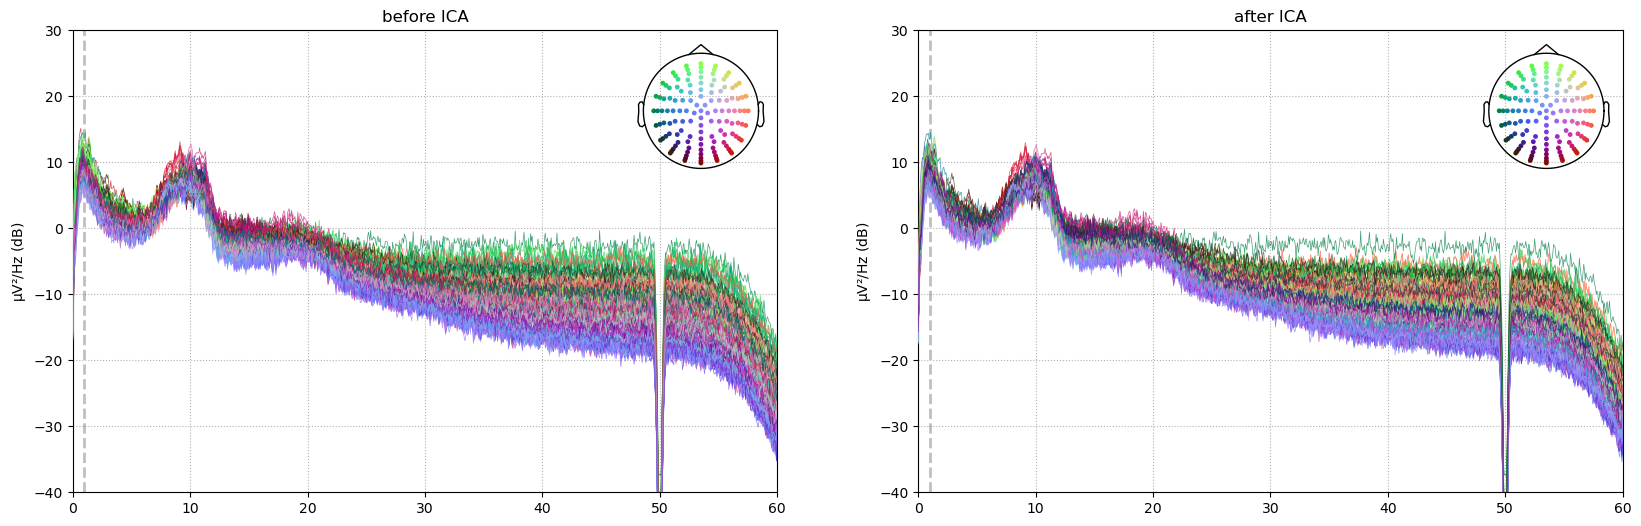

In [29]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

with mne.viz.use_browser_backend('matplotlib'):
    raw_ref.plot_psd(fmax=60, ax=ax[0]);
    ax[0].set_title('before ICA')
    ax[0].set_ylim(-40, 30)
    raw_ica.plot_psd(fmax=60, ax=ax[1]);
    ax[1].set_title('after ICA')
    ax[1].set_ylim(-40, 30)
plt.savefig(os.path.join(subj_analysis_dir, 'psd_before_after_ica.png'))

### Save preprocessed data

In [30]:

raw_ref.save(fname=f"{subj_analysis_dir}/subj_{subj_id}_before_ica_raw.fif")
raw_ica.save(fname=f"{subj_analysis_dir}/subj_{subj_id}_after_ica_raw.fif")

preproc_path = '../../datasets/preprocessed/roch/cocktail_party/'
raw_ica.save(os.path.join(preproc_path,  f"subj_{subj_id}_after_ica_raw.fif"))


Writing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/notebooks/EEG/../../datasets/analysis_outputs/roch/cocktail_party/subj_19/subj_19_before_ica_raw.fif
Closing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/notebooks/EEG/../../datasets/analysis_outputs/roch/cocktail_party/subj_19/subj_19_before_ica_raw.fif
[done]
Writing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/notebooks/EEG/../../datasets/analysis_outputs/roch/cocktail_party/subj_19/subj_19_after_ica_raw.fif
Closing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/notebooks/EEG/../../datasets/analysis_outputs/roch/cocktail_party/subj_19/subj_19_after_ica_raw.fif
[done]
Writing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/notebooks/EEG/../../datasets/preprocessed/roch/cocktail_party/subj_19_after_ica_raw.fif
Closing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/notebooks/EEG/../../datasets/preprocessed/roch/cocktail_party/su

In [31]:
print(subj_analysis_dir)
os.listdir(subj_analysis_dir)


../../datasets/analysis_outputs/roch/cocktail_party/subj_19


['subj_19_after_ica_raw.fif',
 'file-annotations.fif',
 'psd_ref.png',
 'psd_before_after_ica.png',
 'subj_19_before_ica_raw.fif',
 'psd_avgref.png',
 'psd_filtering.png']

In [32]:
len(raw_ica.ch_names)

132